# An Analysis of Hanoi, Vietnam Housing Price using Machine Learning

# Exploratory Data Analysis (EDA)

## Importing necessary libraries and initiate the dataframe

In [1]:
!pip install scikeras

In [2]:
import warnings
import os
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor, KerasClassifier

# Ignoring future warnings and deprecation warnings so as not to make the notebook full of warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the first few lines of the dataset
df = pd.read_csv("VN_housing_dataset.csv")
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### The total records of the dataset

In [4]:
print("The total records of the dataset are: ", str(len(df)), "records.")

The total records of the dataset are:  82497 records.


### Analyse some features in this data set

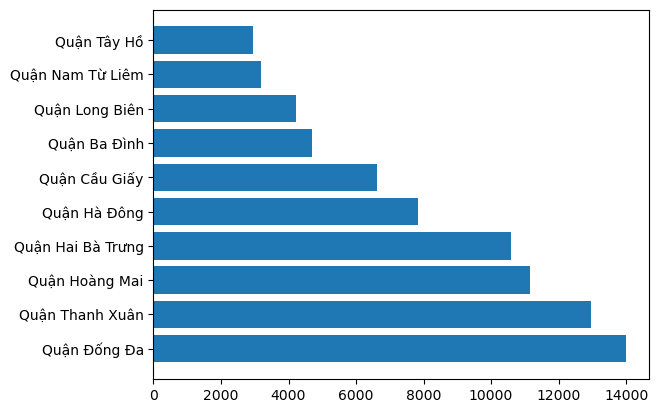

In [5]:
x = df['Quận'].value_counts().keys()

plt.barh(x[:10], df['Quận'].value_counts()[:10]);

Based on the information above, most of records come from: Quận Đống Đa, Quận Thanh Xuân, Quận Hoàng Mai, Quận Hai Bà Trưng, and Quận Hà Đông. It can be inferred that these districts have a high number of real estate transactions.

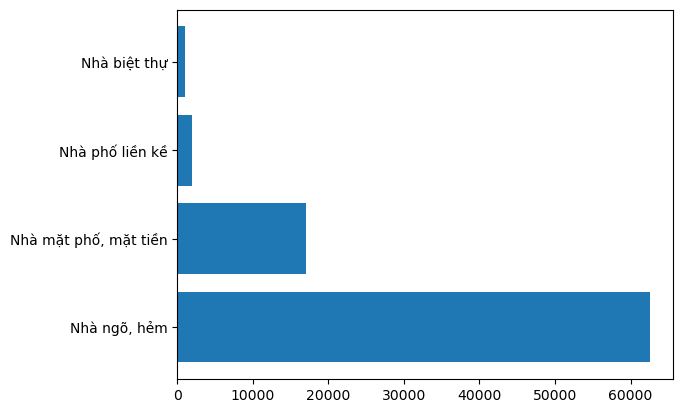

In [6]:
x = df['Loại hình nhà ở'].value_counts()
plt.barh(x.keys(), x);

Based on the information above, most of records are “Nhà ngõ, hẻm” and “Nhà mặt phố, mặt tiền”.

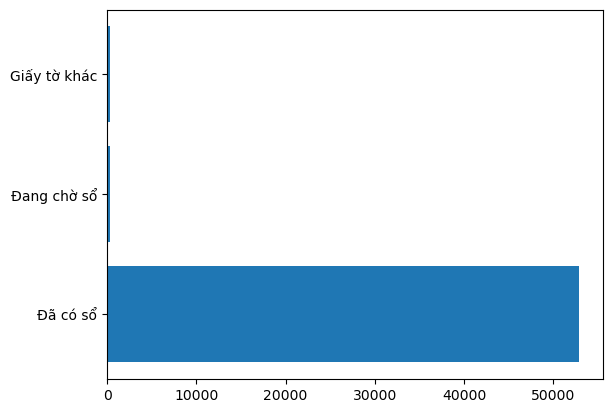

In [7]:
x = df['Giấy tờ pháp lý'].value_counts()
plt.barh(x.keys(), x);

Based on the information above, most of records already have legal paper "Đã có sổ".

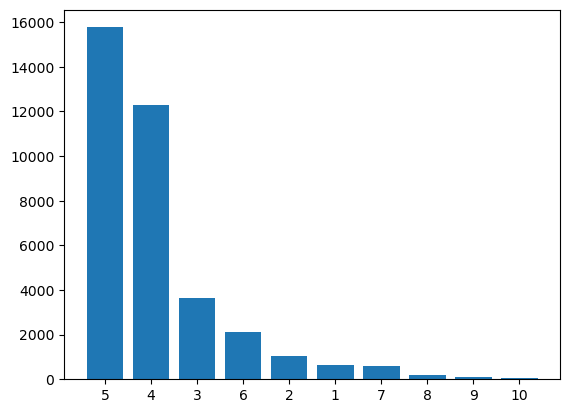

In [8]:
x = df['Số tầng'].value_counts()
plt.bar(x.keys()[:10], x[:10]);

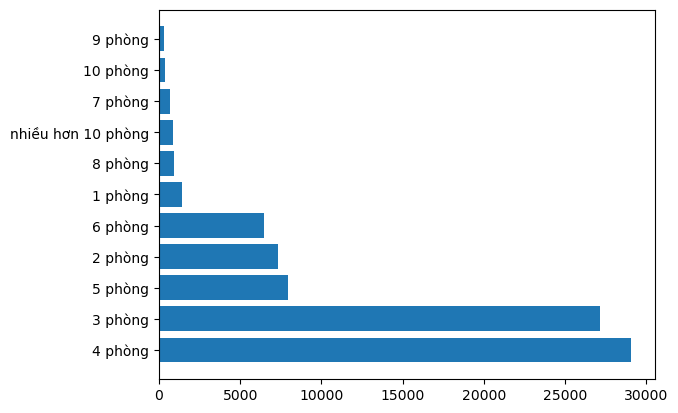

In [9]:
x = df['Số phòng ngủ'].value_counts()
plt.barh(x.keys(), x);

Based on the information above, most of the records have 4 to 5 floors. Moreover, most of the records have up to 3 or 4 rooms in each building.

In [10]:
df["Ngày"] = pd.to_datetime(df["Ngày"])
df["Ngày"].dt.year.value_counts()

2020.0    82478
2019.0       18
Name: Ngày, dtype: int64

Based on the information above, all of the records in this data set are collected in 2019 and 2020.

In [11]:
df["Ngày"] = df["Ngày"].astype(str)

## Cleaning data and removing outliers

### Renaming/Translating column names

In [12]:
df = df.rename(columns = {"Ngày":"date", "Địa chỉ":"address", "Quận":"district",
                                  "Huyện":"ward", "Loại hình nhà ở":"type_of_housing",
                                 "Giấy tờ pháp lý":"legal_paper", "Số tầng":"num_floors",
                                 "Số phòng ngủ":"num_bed_rooms", "Diện tích":"squared_meter_area",
                                 "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"price_in_million_per_square_meter"})

In [13]:
df.head()

,Unnamed: 0,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### Filtering duplicates

In [14]:
df[df.duplicated(keep=False)]

,Unnamed: 0,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter


There are no duplicate values in this data set

### Filtering null values

We can see that there are many NaN values in the data set. Therefore, we have to filter them out.

In [15]:
df = df.drop("Unnamed: 0", axis = 1)
df = df.dropna()
df = df.reset_index()

# The total records of the dataset after dropping null values
print("The total records of the dataset are: ", str(len(df)), "records.")

The total records of the dataset are:  11473 records.


In [16]:
df.head()

,index,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter
0,2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
1,15,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52 m²,12 m,4.2 m,"93,27 triệu/m²"
2,24,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
3,29,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32 m²,6.6 m,4.5 m,"60,94 triệu/m²"
4,34,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42 m²,11 m,4 m,"29,76 triệu/m²"


### Cleaning data within each columns

Removing houses with "Nhiều hơn 10" `num_floors` and "nhiều hơn 10 phòng" `num_bed_rooms` because this cannot be exactly quantified

In [17]:
df = df[df['num_floors'] != 'Nhiều hơn 10']
df = df[df['num_bed_rooms'] != 'nhiều hơn 10 phòng']

Clean columns and convert numerical columns to float type for further computation

In [18]:
df['district'] = df['district'].str.replace('Quận ','').str.strip()
df['ward'] = df['ward'].str.replace('Phường ','').str.strip()
df['num_floors'] = df['num_floors'].str.strip().astype(float)
df['num_bed_rooms'] = df['num_bed_rooms'].str.replace(' phòng','').str.strip().astype(float)
df['squared_meter_area'] = df['squared_meter_area'].str.replace(' m²','').str.strip().astype(float)
df['length_meter'] = df['length_meter'].str.replace(' m','').str.strip().astype(float)
df['width_meter'] = df['width_meter'].str.replace(' m','').str.strip().astype(float)

In [19]:
df[["num_floors", "num_bed_rooms", "squared_meter_area", "length_meter", "width_meter"]]

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter
0,4.0,4.0,40.0,10.0,4.0
1,5.0,4.0,52.0,12.0,4.2
2,5.0,5.0,90.0,18.0,5.0
3,4.0,3.0,32.0,6.6,4.5
4,3.0,2.0,42.0,11.0,4.0
...,...,...,...,...,...
11467,6.0,6.0,65.0,13.0,5.0
11468,2.0,2.0,37.0,13.0,3.0
11470,5.0,4.0,80.0,14.0,5.0
11471,3.0,5.0,89.0,20.0,4.0


Text(0.5, 0, 'Square meter (m2)')

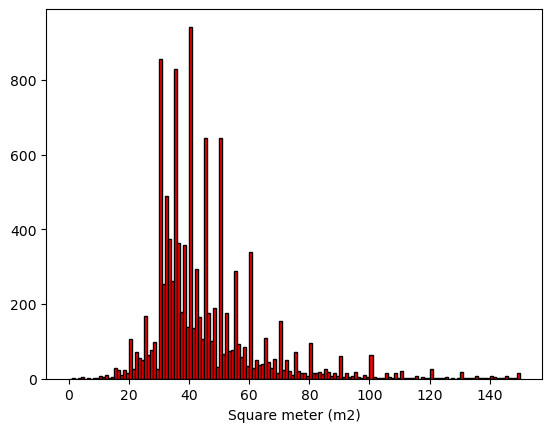

In [20]:
x = df['squared_meter_area']
plt.hist(x, edgecolor='black', color='red', bins=np.arange(0, 150+1))
plt.xlabel("Square meter (m2)")

Based on the information above, most of the records have their area fall in 30 to 60 square meters (m2)

Clean and convert all prices to million/m2 instead of VND/m2 or billion/m2

In [21]:
df.groupby('price_in_million_per_square_meter').count()['date']

price_in_million_per_square_meter
1 triệu/m²           1
1 tỷ/m²              2
1,03 triệu/m²        1
1,033333333 tỷ/m²    1
1,05 triệu/m²        1
                    ..
99,75 triệu/m²       1
99,8 triệu/m²        1
99,83 triệu/m²       2
99,9 triệu/m²        1
99.415 đ/m²          1
Name: date, Length: 3174, dtype: int64

In [22]:
df.loc[df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df.loc[df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df.loc[df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001

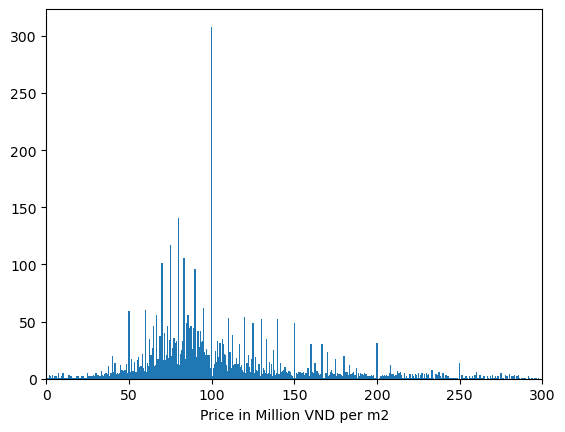

In [23]:
x = df['price_in_million_per_square_meter'].value_counts()
plt.bar(x.keys(), x);
plt.xlabel("Price in Million VND per m2")
plt.xlim([0, 300]);

According to the graph, most of the prices of the records fall into the range from 50 to 100 Million VND per m2, especially more than 300 houses that have the price of 100 Million VND/m2. It can be inferred that houses in Hanoi are pretty expensive compared to other cities.

Is price affected by `type_of_housing`?

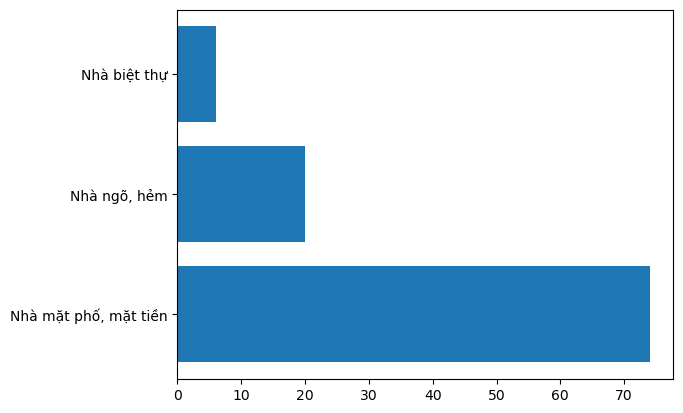

In [24]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['type_of_housing'][x.index].value_counts()
plt.barh(x.keys(), x);

Is price affected by `legal paper`?

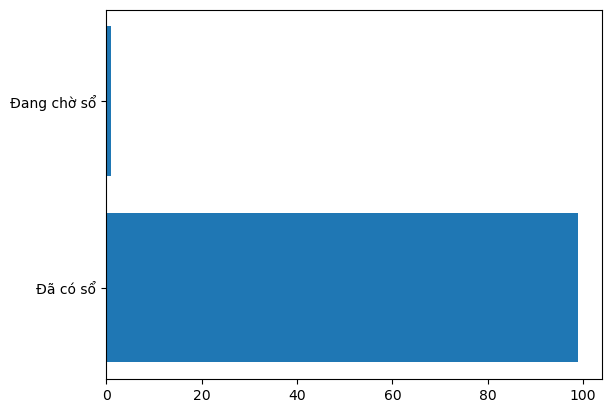

In [25]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['legal_paper'][x.index].value_counts()
plt.barh(x.keys(), x);

In [26]:
df[['address', 'district', 'price_in_million_per_square_meter']]

,address,district,price_in_million_per_square_meter
0,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,65.0
1,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Long Biên,93.27
2,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Hà Đông,108.89
3,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Nam Từ Liêm,60.94
4,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,29.76
...,...,...,...
11467,"Đường Ngụy Như Kon Tum, Phường Nhân Chính, Quậ...",Thanh Xuân,192.31
11468,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Hoàng Mai,43.24
11470,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Đống Đa,262.5
11471,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Đống Đa,258.43


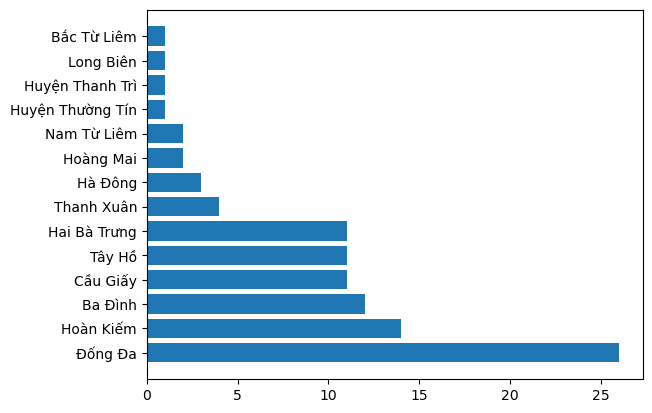

In [27]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['district'][x.index].value_counts()
plt.barh(x.keys(), x);

According to these graphs above, "Đã có sổ", "Nhà mặt phố, mặt tiền", "Đống Đa" and "Hoàn Kiếm" are the factors which affects a house's price. Therefore, the location of the house ("Nhà mặt phố, mặt tiền"), the legal paper of the house ("Đã có sổ"), and the district where the house located ("Đống Đa", "Hoàn Kiếm",...) can lead to a very high house's price.

Visualize the distribution of `type_of_housing` and `legal_paper`

<Axes: ylabel='legal_paper'>

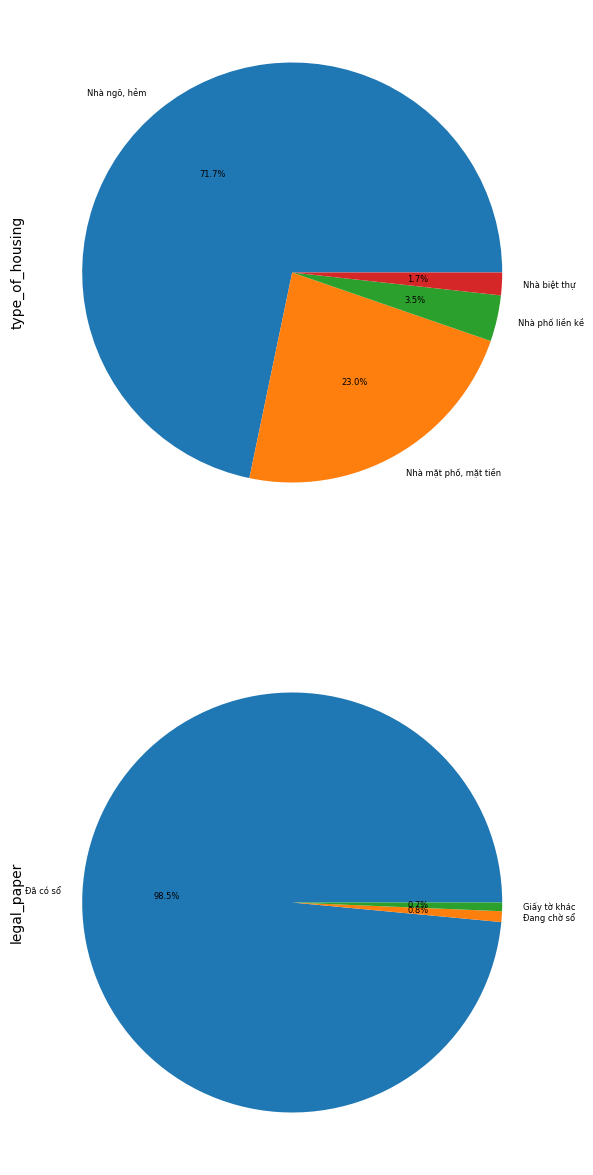

In [28]:
fig, axis = plt.subplots(2,1,figsize=(10,15))
fig.subplots_adjust(left=1, right=2, wspace=0.5)

df['type_of_housing'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[0], fontsize=6)
df['legal_paper'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[1], fontsize=6)

- Most of the houses in Hanoi are "Nhà ngõ, hẻm".
- Most of the houses in Hanoi have legal paper "Đã có sổ".

# Create dummies for categorical columns

In [29]:
df.columns

Index(['index', 'date', 'address', 'district', 'ward', 'type_of_housing',
       'legal_paper', 'num_floors', 'num_bed_rooms', 'squared_meter_area',
       'length_meter', 'width_meter', 'price_in_million_per_square_meter'],
      dtype='object')

In [30]:
dummy_type_of_housing = pd.get_dummies(df.type_of_housing, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(df.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(df.district, prefix="district")
dummy_ward = pd.get_dummies(df.ward, prefix="ward")

df_cleaned = pd.concat([df, dummy_type_of_housing, dummy_legal_paper, dummy_district, dummy_ward], axis=1)
df_cleaned = df_cleaned.drop(['index', 'date', 'address', 'district', 'ward', 'type_of_housing', 'legal_paper'], axis = 1)
df_cleaned.head()

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâm,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,5.0,90.0,18.0,5.0,108.89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_cleaned.columns

Index(['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
       'width_meter', 'price_in_million_per_square_meter',
       'housing_type_Nhà biệt thự', 'housing_type_Nhà mặt phố, mặt tiền',
       'housing_type_Nhà ngõ, hẻm', 'housing_type_Nhà phố liền kề',
       ...
       'ward_Đại Mỗ', 'ward_Định Công', 'ward_Đống Mác', 'ward_Đồng Mai',
       'ward_Đồng Nhân', 'ward_Đồng Tâm', 'ward_Đồng Xuân', 'ward_Đội Cấn',
       'ward_Đức Giang', 'ward_Đức Thắng'],
      dtype='object', length=281)

# Removing outliers using IQR method

In [32]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

removed_outliers = df_cleaned
columns_to_remove_outliers = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
                              'width_meter', 'price_in_million_per_square_meter']
for column in columns_to_remove_outliers:
    removed_outliers = remove_outlier_IQR(removed_outliers, column)

print("The final length of the dataset is", str(len(removed_outliers)), "rows.")

The final length of the dataset is 7328 rows.


# Scale variables using Standard Scaler and create train-test set

In [33]:
removed_outliers.head()

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâm,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4.0,43.0,11.0,4.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
housing = removed_outliers

# Separate predictors and response (price) variables
X = housing.loc[:, (housing.columns != 'price_in_million_per_square_meter') & (housing.columns != 'date')]
y = housing[['price_in_million_per_square_meter']]
to_be_scaled = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter', 'width_meter']

# Initiate scaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

X_scaled = X
y_scaled = y

# Storing the fit object for reference and reverse the scaling later
PredictorScalerFit=PredictorScaler.fit(X_scaled[to_be_scaled])
TargetVarScalerFit=TargetVarScaler.fit(y_scaled)

# Generating the standardized values of X and y
X_scaled[to_be_scaled]=PredictorScalerFit.transform(X_scaled[to_be_scaled])
y_scaled=TargetVarScalerFit.transform(y)

X_array = np.array(X_scaled.values).astype("float32")
y_array = np.array(y_scaled).astype("float32")

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,
                                                    test_size=0.2,
                                                    random_state=2023)

# Sanity check to see if all train and test arrays have correct dimensions
assert X_train.shape[0] == y_train.shape[0] and X_train.shape[1] == X_test.shape[1] and X_test.shape[0] == y_test.shape[0] and y_train.shape[1] == y_test.shape[1], \
"All train and test sets should have correct dimensions."

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5862, 280) (1466, 280) (5862, 1) (1466, 1)


# Using Traditional Linear Regression in Statistics

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4745320200783678


In [39]:
y_pred = model.intercept_ + np.sum(model.coef_ * X_test, axis=1)
print("The prediction of the statistical Linear Regression model:\n", y_pred)

The prediction of the statistical Linear Regression model:
 [ 0.4732666   1.5821533   0.76257324 ... -0.39733887 -0.43151855
  0.49273682]


The results have already been scaled for better computation according to the previous commands. Therefore, we will not truly understand these numbers, except the model. Let's just consider the coefficient of determination: $R^2$ < 50% is not quite good enough! As a result, we can take Polynomial Regression into consideration.

In [40]:
from sklearn.preprocessing import PolynomialFeatures
X_train_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_train_.shape

(5862, 39620)

In [41]:
new_model = LinearRegression()
new_model.fit(X_train_, y_train)

LinearRegression()

In [42]:
r_sq = new_model.score(X_train_, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6141094314593618


As you can see, our results when applied with Polynomial Regression have improved significantly, from < 50% to > 60%. However, we can still apply current Machine Learning methods for even better results. In this case, we try to use a traditional Machine Learning algorithm which is Random Forest, and a modern one, Neural Network. Let's dive deep into them!

# Training a Machine Learning Model for Regression

## Finding best parameters for the Neural Network using grid search

It is generally believed that 1 hidden layer is enough for most problems, and the number of neurons is only 10 to prevent underfitting or overfitting.


In [43]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create the base model
def create_regression_NN():
    model = Sequential()
    model.add(Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Creathe a dictionary for trial parameters
NN_params = {'batch_size':[10, 20, 30, 50],
             'epochs':[10, 20, 50]}

NN_trial = KerasRegressor(create_regression_NN, verbose=1)

# Initiate the grid search and storing best parameters for later reference
NN_grid_search = GridSearchCV(estimator=NN_trial, param_grid=NN_params,
                               cv=3, n_jobs = -1).fit(X_train, y_train, verbose=1)
NN_best_params = NN_grid_search.best_params_

# Showing the best parameters
NN_best_params



Epoch 1/20

118/118 [==============================] - 4s 2ms/step - loss: 0.9264
Epoch 2/20
118/118 [==============================] - 0s 1ms/step - loss: 0.6866
Epoch 3/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5970
Epoch 4/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5699
Epoch 5/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5541
Epoch 6/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5455
Epoch 7/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5415
Epoch 8/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5357
Epoch 9/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5328
Epoch 10/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 11/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5268
Epoch 12/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5246
Epoch 13/20
118/118 [=

{'batch_size': 50, 'epochs': 20}

## Training the NN model with the best parameters

In [44]:
# Fitting the NN to the Training set
NN = Sequential()
NN.add(Dense(units=10, input_dim=X_train.shape[1],
                kernel_initializer='normal', activation='relu'))
NN.add(Dense(1, kernel_initializer='normal'))
NN.compile(loss='mean_squared_error', optimizer='adam')

NN.fit(X_train, y_train,
       batch_size = int(NN_best_params['batch_size']),
        epochs = int(NN_best_params['epochs']),
       verbose=1)

# Generating Predictions on testing data
NN_predictions = NN.predict(X_test)

# Scaling the predicted Price data back to original price scale
NN_predictions = TargetVarScalerFit.inverse_transform(NN_predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreating the dataset, now with predicted price using the NN model
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig
TestingData['NN_predictions'] = NN_predictions

TestingData[['Price', 'NN_predictions']].head()

Epoch 1/20
118/118 [==============================] - 3s 1ms/step - loss: 0.9604
Epoch 2/20
118/118 [==============================] - 0s 1ms/step - loss: 0.7258
Epoch 3/20
118/118 [==============================] - 0s 938us/step - loss: 0.6020
Epoch 4/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5691
Epoch 5/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5534
Epoch 6/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5440
Epoch 7/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5377
Epoch 8/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5323
Epoch 9/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 10/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5256
Epoch 11/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 12/20
118/118 [==============================] - 0s 1ms/step - loss: 0.5192
Epoch 13/20
118/118 [==

,Price,NN_predictions
0,85.709999,105.602280
1,138.369995,127.846428
2,132.000000,111.962067
3,125.639999,96.702415
4,110.190002,112.873993


# Training a Random Forest model for Regression

## Finding best parameters for the Random Forest model using random search and grid search

In [45]:
# Create a dictionary of random parameters for the model
RF_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [46]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create the base RF model and fit the random search
RF_regressor = RandomForestRegressor()
RF_random_search = RandomizedSearchCV(estimator=RF_regressor, param_distributions=RF_random_grid, n_iter=50, cv=2,
                                      verbose=1, random_state=2022, n_jobs = -1).fit(X_train, np.ravel(y_train))
RF_best_params = RF_random_search.best_params_
RF_best_params

Fitting 2 folds for each of 50 candidates, totalling 100 fits


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': True}

In [47]:
# Narrowing the parameters grid based on the best parameters given by the random search, then feed the grid to a grid search
RF_param_grid = {'n_estimators': [RF_best_params['n_estimators']-100, RF_best_params['n_estimators']],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [RF_best_params['max_depth'] - 10, RF_best_params['max_depth']],
               'min_samples_split': [5, 10],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

In [48]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create another base RF model and fit the grid search
RF_regressor_2 = RandomForestRegressor()
RF_grid_search = GridSearchCV(estimator=RF_regressor_2, param_grid=RF_param_grid,
                              cv=2, n_jobs=-1, verbose=4).fit(X_train, np.ravel(y_train))

# Showing the best parameters
RF_grid_search.best_params_

Fitting 2 folds for each of 64 candidates, totalling 128 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

## Testing the Random Forest model with the best parameters

In [49]:
# Fitting a RF model with the best parameters
RF = RF_grid_search.best_estimator_

# Generating Predictions on testing data
RF_predictions = RF.predict(X_test)

# Scaling the predicted Price data back to original price scale
RF_predictions = TargetVarScalerFit.inverse_transform(np.resize(RF_predictions, (1466,1)))
TestingData['RF_predictions'] = RF_predictions

In [50]:
LR_predictions = model.predict(X_test)
LR_predictions = TargetVarScalerFit.inverse_transform(LR_predictions)
TestingData['LR_predictions'] = LR_predictions
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(LR_predictions, y_test))

18243.87

In [51]:
X_test_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
X_test_.shape

(1466, 39620)

In [52]:
# Scaling the y_test Price data back to original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreating the dataset, now with predicted price using the NN model
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig

In [53]:
PR_predictions = new_model.predict(X_test_)
PR_predictions = TargetVarScalerFit.inverse_transform(PR_predictions)
TestingData['PR_predictions'] = PR_predictions
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(PR_predictions, y_test))

870.1138

In [54]:
TestingData['PR_predictions']

0        146.160873
1        169.245819
2        127.327415
3         90.707512
4        146.322678
           ...     
1461      77.597702
1462   -7632.960449
1463      74.431290
1464      77.803925
1465     101.018951
Name: PR_predictions, Length: 1466, dtype: float32

In [55]:
print(TestingData.columns)


Index(['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
       'width_meter', 'housing_type_Nhà biệt thự',
       'housing_type_Nhà mặt phố, mặt tiền', 'housing_type_Nhà ngõ, hẻm',
       'housing_type_Nhà phố liền kề', 'legal_paper_Giấy tờ khác',
       ...
       'ward_Đống Mác', 'ward_Đồng Mai', 'ward_Đồng Nhân', 'ward_Đồng Tâm',
       'ward_Đồng Xuân', 'ward_Đội Cấn', 'ward_Đức Giang', 'ward_Đức Thắng',
       'Price', 'PR_predictions'],
      dtype='object', length=282)


In [56]:
# Scale the y_test Price data back to the original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

# Scale the test data back to the original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreate the dataset, now with predicted prices using the different models
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig
TestingData['NN_predictions'] = NN_predictions
TestingData['RF_predictions'] = RF_predictions
TestingData['LR_predictions'] = LR_predictions
TestingData['PR_predictions'] = PR_predictions

# Display the desired columns using head()
columns_to_display = ['Price', 'NN_predictions', 'RF_predictions', 'LR_predictions', 'PR_predictions']
TestingData = TestingData[columns_to_display].head()
print(TestingData)

        Price  NN_predictions  RF_predictions  LR_predictions  PR_predictions
0   85.709999      105.602280      114.032826      100.571594      146.160873
1  138.369995      127.846428      127.136031      129.430954      169.245819
2  132.000000      111.962067      105.423155      108.103714      127.327415
3  125.639999       96.702415       84.837484       95.999664       90.707512
4  110.190002      112.873993      107.227215      112.891396      146.322678


In [57]:
print(TestingData.columns)

Index(['Price', 'NN_predictions', 'RF_predictions', 'LR_predictions',
       'PR_predictions'],
      dtype='object')


# Final result: Neural Network vs. Random Forest vs. Linear Regression

In [58]:
# Define a function evaluate the predictions
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return(100 - MAPE)

In [59]:
# Showing scores for both the NN and the RF model
print("Accuracy for the NN model is:", str(Accuracy_Score(TestingData['Price'], TestingData['NN_predictions'])))
print("Accuracy for the RF model is:", str(Accuracy_Score(TestingData['Price'], TestingData['RF_predictions'])))
print("Accuracy for the LR model is:", str(Accuracy_Score(TestingData['Price'], TestingData['LR_predictions'])))

Accuracy for the NN model is: 85.70752429962158
Accuracy for the RF model is: 80.70755077891748
Accuracy for the LR model is: 86.41081047058105


In [60]:
print("Accuracy for the PR model is:", str(Accuracy_Score(TestingData['Price'], TestingData['PR_predictions'])))

Accuracy for the PR model is: 68.6043586730957


Polynomial Regression seems to be Overfitting.

# Final conclusion

NN > Random Forest > Linear Regression (Traditional econometric method)

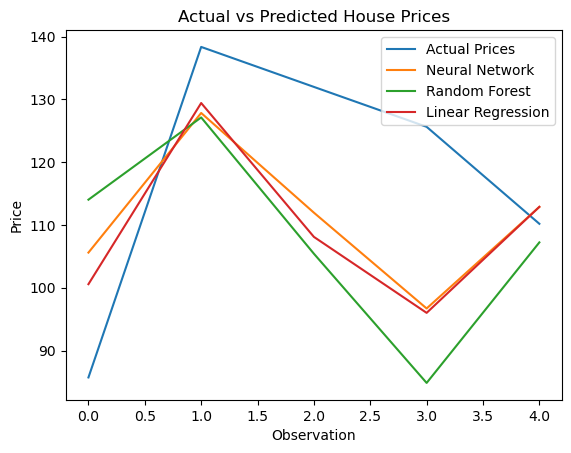

In [61]:
import matplotlib.pyplot as plt

# Assuming you have the actual prices and predicted prices from each algorithm
actual_prices = TestingData['Price']
NN_predictions = TestingData['NN_predictions']
RF_predictions = TestingData['RF_predictions']
LR_predictions = TestingData['LR_predictions']


# Create a list to hold the labels for each algorithm
algorithm_labels = ['Neural Network', 'Random Forest', 'Linear Regression', 'Polynomial Regression']

# Create a list to hold the predicted prices for each algorithm
predicted_prices = [NN_predictions, RF_predictions, LR_predictions]

# Create a figure and axis for the line chart
fig, ax = plt.subplots()

# Plot the actual prices
ax.plot(actual_prices, label='Actual Prices')

# Plot the predicted prices from each algorithm
for i, prices in enumerate(predicted_prices):
    ax.plot(prices, label=algorithm_labels[i])

# Customize the chart
ax.set_xlabel('Observation')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted House Prices')
ax.legend()

# Display the chart
plt.show()

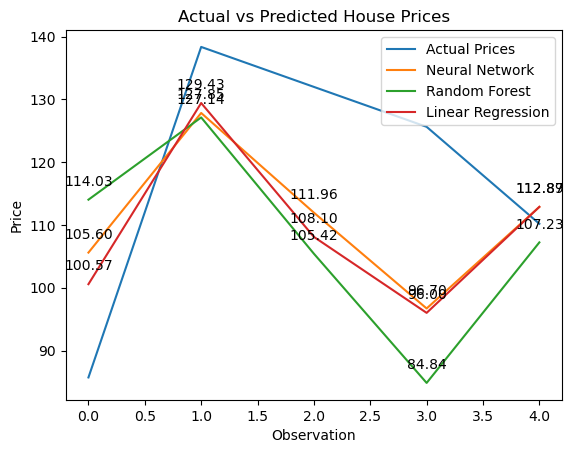

In [62]:
import matplotlib.pyplot as plt

# Assuming you have the actual prices and predicted prices from each algorithm
actual_prices = TestingData['Price']
NN_predictions = TestingData['NN_predictions']
RF_predictions = TestingData['RF_predictions']
LR_predictions = TestingData['LR_predictions']

# Create a list to hold the labels for each algorithm
algorithm_labels = ['Neural Network', 'Random Forest', 'Linear Regression', 'Polynomial Regression']

# Create a list to hold the predicted prices for each algorithm
predicted_prices = [NN_predictions, RF_predictions, LR_predictions]

# Create a figure and axis for the line chart
fig, ax = plt.subplots()

# Plot the actual prices
ax.plot(actual_prices, label='Actual Prices')

# Plot the predicted prices from each algorithm
for i, prices in enumerate(predicted_prices):
    ax.plot(prices, label=algorithm_labels[i])
    
    # Annotate the specific house prices
    for j, price in enumerate(prices):
        ax.annotate(f'{price:.2f}', (j, price), textcoords="offset points", xytext=(0,10), ha='center')

# Customize the chart
ax.set_xlabel('Observation')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted House Prices')
ax.legend()

# Display the chart
plt.show()

In [63]:
import pandas as pd

# Assuming you have the actual prices and predicted prices from each algorithm
actual_prices = TestingData['Price']
NN_predictions = TestingData['NN_predictions']
RF_predictions = TestingData['RF_predictions']
LR_predictions = TestingData['LR_predictions']

# Create a list to hold the labels for each algorithm
algorithm_labels = ['Neural Network', 'Random Forest', 'Linear Regression', 'Polynomial Regression']

# Create a DataFrame to hold the predicted prices for each algorithm
df_predictions = pd.DataFrame({
    'Neural Network': NN_predictions,
    'Random Forest': RF_predictions,
    'Linear Regression': LR_predictions
})

# Print detailed information for each algorithm's predicted prices
for algorithm in algorithm_labels:
    algorithm_predictions = df_predictions[algorithm]
    algorithm_info = pd.DataFrame({
        'Actual Price': actual_prices,
        'Predicted Price': algorithm_predictions
    })
    print(f'{algorithm} Predictions:')
    print(algorithm_info)
    print()

Neural Network Predictions:
   Actual Price  Predicted Price
0     85.709999       105.602280
1    138.369995       127.846428
2    132.000000       111.962067
3    125.639999        96.702415
4    110.190002       112.873993

Random Forest Predictions:
   Actual Price  Predicted Price
0     85.709999       114.032826
1    138.369995       127.136031
2    132.000000       105.423155
3    125.639999        84.837484
4    110.190002       107.227215

Linear Regression Predictions:
   Actual Price  Predicted Price
0     85.709999       100.571594
1    138.369995       129.430954
2    132.000000       108.103714
3    125.639999        95.999664
4    110.190002       112.891396



KeyError: 'Polynomial Regression'

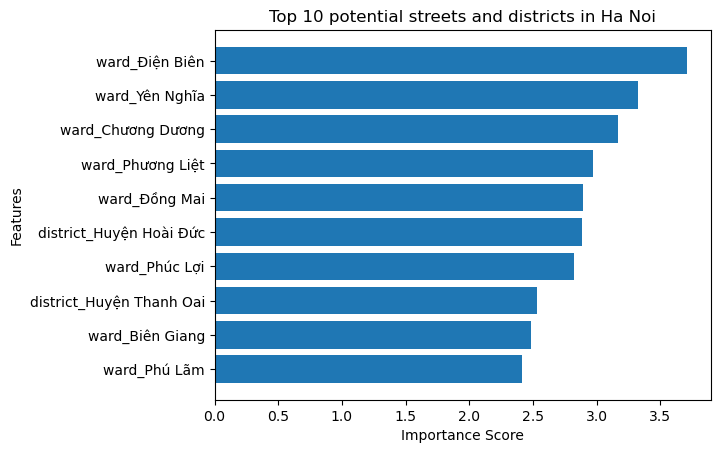

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have fitted a Neural Network model named 'NN' on your data
# and 'X' represents the feature matrix

# Get the weights from the first layer of the NN model
weights = NN.layers[0].get_weights()[0]

# Get the absolute values of the weights
abs_weights = np.abs(weights)

# Calculate the importance scores by summing the weights across all input features
importance_scores = np.sum(abs_weights, axis=1)

# Get the indices of the top 10 most important features
top_10_indices = np.argsort(importance_scores)[-10:]

# Get the names of the top 10 most important features
top_10_features = X.columns[top_10_indices]

# Create a bar plot to visualize the feature importances
plt.barh(range(10), importance_scores[top_10_indices], align='center')
plt.yticks(range(10), top_10_features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 potential streets and districts in Ha Noi')
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have the actual prices 'y_true' and predicted prices from the three models:
# 'y_pred_nn' for the NN model
# 'y_pred_rf' for the RF model
# 'y_pred_lr' for the LR model

# Calculate MAE for each model
mae_nn = mean_absolute_error(TestingData['Price'], TestingData['NN_predictions'])
mae_rf = mean_absolute_error(TestingData['Price'], TestingData['RF_predictions'])
mae_lr = mean_absolute_error(TestingData['Price'], TestingData['LR_predictions'])

# Calculate MSE for each model
mse_nn = mean_squared_error(TestingData['Price'], TestingData['NN_predictions'])
mse_rf = mean_squared_error(TestingData['Price'], TestingData['RF_predictions'])
mse_lr = mean_squared_error(TestingData['Price'], TestingData['LR_predictions'])

# Calculate R^2 for each model
r2_nn = r2_score(TestingData['Price'], TestingData['NN_predictions'])
r2_rf = r2_score(TestingData['Price'], TestingData['RF_predictions'])
r2_lr = r2_score(TestingData['Price'], TestingData['LR_predictions'])

# Print the results
print("MAE for the NN model:", mae_nn)
print("MAE for the RF model:", mae_rf)
print("MAE for the LR model:", mae_lr)
print()
print("MSE for the NN model:", mse_nn)
print("MSE for the RF model:", mse_rf)
print("MSE for the LR model:", mse_lr)
print()
print("R^2 for the NN model:", r2_nn)
print("R^2 for the RF model:", r2_rf)
print("R^2 for the LR model:", r2_lr)

MAE for the NN model: 16.415071
MAE for the RF model: 21.979787867144157
MAE for the LR model: 16.00773

MSE for the NN model: 350.51093
MSE for the RF model: 661.6673155698975
MSE for the LR model: 351.53058

R^2 for the NN model: 0.011094700437162874
R^2 for the RF model: -0.866778633123021
R^2 for the LR model: 0.00821793953427874


In [69]:
!pip install scikit-learn
!pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


tree = DecisionTreeRegressor()


tree.fit(X_train, y_train)


tree_predictions = tree.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, tree_predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, tree_predictions)
print("Mean Absolute Error (MAE):", mae)

# R-squared
r2 = r2_score(y_test, tree_predictions)
print("R-squared:", r2)


Mean Squared Error (MSE): 745.4679203695051
Root Mean Squared Error (RMSE): 27.303258420369996
Mean Absolute Error (MAE): 18.944974874943156
R-squared: -0.03973042173686547
